In [133]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import time
import seaborn as sns
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip3 install langdetect
from langdetect import detect

You should consider upgrading via the 'c:\users\kachase\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'langdetect'

In [134]:
!pip3 install langdetect



You should consider upgrading via the 'c:\users\kachase\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [135]:
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kachase\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kachase\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kachase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
tweets_1 = pd.read_csv("C:/Users/kachase/Desktop/tweets/tweets(1).csv")
tweets_2 = pd.read_csv("C:/Users/kachase/Desktop/tweets/tweets.csv")

In [137]:
tweets_1.shape, tweets_2.shape

((5547, 11), (5154, 11))

In [138]:
tweets_df = pd.concat([tweets_1,tweets_2],sort=True)

In [139]:
tweets_df.drop_duplicates(inplace = True)    # Drop duplicates
tweets_df.reset_index(drop = True, inplace = True)
len(tweets_df)

10701

In [140]:
tweets_df.head(5)

,Tweets,Unnamed: 0,coordinateS,coordinates,date,id,lang,lens,likes,place,retweets,source
0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,0,NaN,NaN,2021-05-07 21:38:16,1390783063920046080,und,140,0,NaN,2,Twitter Web App
1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1,NaN,NaN,2021-05-07 21:34:57,1390782227089342464,en,140,0,NaN,43,Twitter for Android
2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,2,NaN,NaN,2021-05-07 21:34:52,1390782207061544961,en,183,0,NaN,0,Twitter for iPhone
3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,3,NaN,NaN,2021-05-07 21:33:35,1390781884439859209,en,140,0,NaN,43,Twitter Web App
4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,4,NaN,NaN,2021-05-07 21:26:07,1390780006435987456,en,140,0,NaN,279,Twitter for Android


In [141]:
Tweets_lang = tweets_df.lang.value_counts().to_frame()

In [142]:
Tweets_lang.T

,en,hi,und,fr,in,ur,gu,or,bn,tl,...,de,kn,pa,te,ml,et,nl,ht,ro,ko
lang,8943,1145,238,78,46,36,35,24,22,20,...,4,4,4,3,3,2,2,2,2,2


In [143]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [144]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [145]:
# function for text pre-processing
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString = newString.replace('\n','')
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString = re.sub("rt ","",newString)
    newString= re.sub(r"'s\b","",newString)                       #removing 's
    newString= re.sub(r"b'","",newString)
    newString=newString.strip().replace('b"', '')
    #newString = newString.split()
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+ps.stem(lemmatizer.lemmatize(i))+' '            #converting words to lemma                               
        #newString = newString+ps.stem(i)+' '
    return newString.strip() 

In [146]:
cleaned_tweet = []
newtext = ""
for text in tweets_df['Tweets']:
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""

In [147]:
tweets_df['cleaned_tweet'] = cleaned_tweet

In [148]:
# from nltk.corpus import words
# clean_words = []

# for x in tweets_df['Tweets']:
#     if x in words.words():
#         clean_words.append(x)

In [149]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [150]:
def lemmatize_text(text):
    return [ps.stem(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize(text)]

In [151]:
tweets_df['cleaned_tweet_preprocess'] = tweets_df['cleaned_tweet'].apply(lemmatize_text)
tweets_df['cleaned_tweet_preprocess'] = tweets_df['cleaned_tweet_preprocess'].apply(', '.join)

In [152]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in tweets_df['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
tweets_df['cleaned_tweet_extensive']= cleaned_tweets_extensive
tweets_df.head(10)

,Tweets,Unnamed: 0,coordinateS,coordinates,date,id,lang,lens,likes,place,retweets,source,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,0,NaN,NaN,2021-05-07 21:38:16,1390783063920046080,und,140,0,NaN,2,Twitter Web App,b'rt @odd_joker:,"b'rt, @odd_joker:",rt joker
1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1,NaN,NaN,2021-05-07 21:34:57,1390782227089342464,en,140,0,NaN,43,Twitter for Android,b'rt @googleexpertuk: @jengwenbrown @wb_uk @nh...,"b'rt, @googleexpertuk:, @jengwenbrown, @wb_uk,...",rt uk kind
2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,2,NaN,NaN,2021-05-07 21:34:52,1390782207061544961,en,183,0,NaN,0,Twitter for iPhone,is rapist...the and #moscowmitch keeps saying ...,"is, rapist...th, and, #moscowmitch, keep, say,...",rapist th moscowmitch keep say rapecultur keep...
3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,3,NaN,NaN,2021-05-07 21:33:35,1390781884439859209,en,140,0,NaN,43,Twitter Web App,b'rt @googleexpertuk: @jengwenbrown @wb_uk @nh...,"b'rt, @googleexpertuk:, @jengwenbrown, @wb_uk,...",rt uk kind
4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,4,NaN,NaN,2021-05-07 21:26:07,1390780006435987456,en,140,0,NaN,279,Twitter for Android,b'rt @justiceozzie: ms brittany higgins : the ...,"b'rt, @justiceozzie:, m, brittani, higgin, :, ...",rt brittani higgin start meet scott morrison m...
5,b'RT @ThePeoplesHubUK: @GoogleExpertUK @do_kin...,5,NaN,NaN,2021-05-07 21:23:58,1390779466293596169,en,140,0,NaN,19,Twitter Web App,b'rt @thepeopleshubuk: @googleexpertuk @do_kin...,"b'rt, @thepeopleshubuk:, @googleexpertuk, @do_...",rt kind garrett
6,b'RT @ThePeoplesHubUK: @GoogleExpertUK @do_kin...,6,NaN,NaN,2021-05-07 21:12:35,1390776599822225409,en,140,0,NaN,19,Twitter for Android,b'rt @thepeopleshubuk: @googleexpertuk @do_kin...,"b'rt, @thepeopleshubuk:, @googleexpertuk, @do_...",rt kind garrett
7,b'\xe2\x9a\xa0\xef\xb8\x8fA credible source in...,7,NaN,NaN,2021-05-07 21:08:30,1390775573006405634,en,316,0,NaN,0,Twitter Web App,credible source in #tigray: #hawzien hospital ...,"credibl, sourc, in, #tigray:, #hawzien, hospit...",credibl sourc tigray hawzien hospit sieg troop...
8,b'RT @FarazPervaiz3: @arifaajakia In Gujranwal...,8,NaN,NaN,2021-05-07 21:03:17,1390774257765036036,en,140,0,NaN,1,Twitter for Android,"b'rt @arifaajakia in gujranwala, another chris...","b'rt, @arifaajakia, in, gujranwala,, anoth, ch...",rt gujranwala anoth christian girl kinza wa ra...
9,b'#MonaLisa\xe2\x80\x98s account of\xc2\xa0#ra...,9,NaN,NaN,2021-05-07 21:02:40,1390774105700511754,en,275,0,NaN,0,Twitter for Android,account one of hundreds where wave of has been...,"account, one, of, hundr, where, wave, of, ha, ...",account one hundr wave ha commit last


In [153]:
#Function to Create Wordcloud
def create_wordcloud(text):
#  mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 max_words=50,
 stopwords=stopwords,collocations = False,
 repeat=True)
 wc.generate(str(text))
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wc) 
 plt.axis("off") 
 plt.tight_layout(pad = 0) 
 #plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight') 
 plt.show() 

##Top 25 trending hashtags from tweets

In [154]:
# function to collect hashtags
def mention_extract(text_list):
    mentions = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"@(\w+)", text)
        mentions.append(ht)

    return mentions

def generate_mentions_freqdist(mentions):
    a = nltk.FreqDist(mentions)
    d = pd.DataFrame({'Mentions': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Mentions", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    #plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

In [155]:
# function to collect hashtags
def hashtags_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtags_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtags': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtags", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    #plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

In [156]:
# function to collect words
def words_extract(text_list):
    words = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"(\w+)", text)
        words.append(ht)

    return words

def generate_words_freqdist(words):
    a = nltk.FreqDist(words)
    d = pd.DataFrame({'words': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "words", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    #plt.savefig(text_query + '_hashtag_frequency_dist.png')
    plt.show()

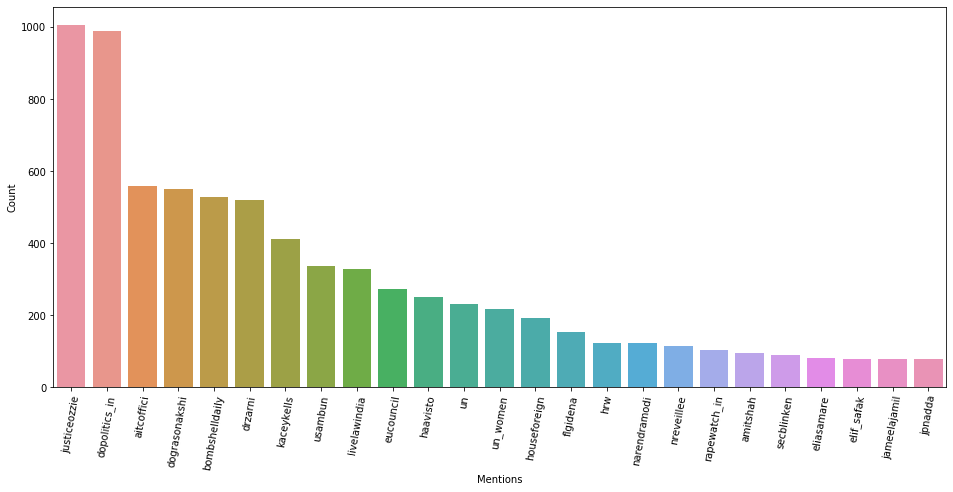

In [157]:
mentions = mention_extract(tweets_df['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

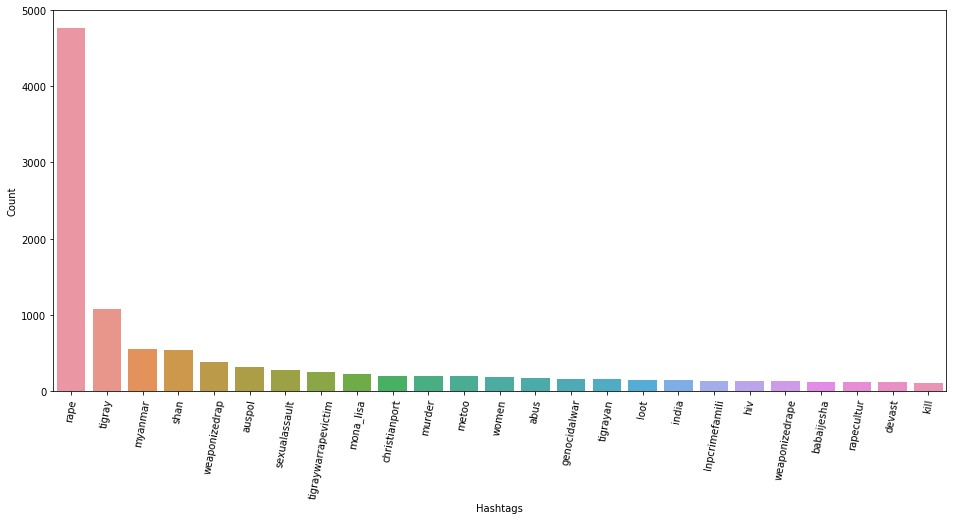

In [158]:
hashtags = hashtags_extract(tweets_df['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

In [159]:
stopwords = STOPWORDS
filtered_words = [word for word in all_words.split() if word not in stopwords]

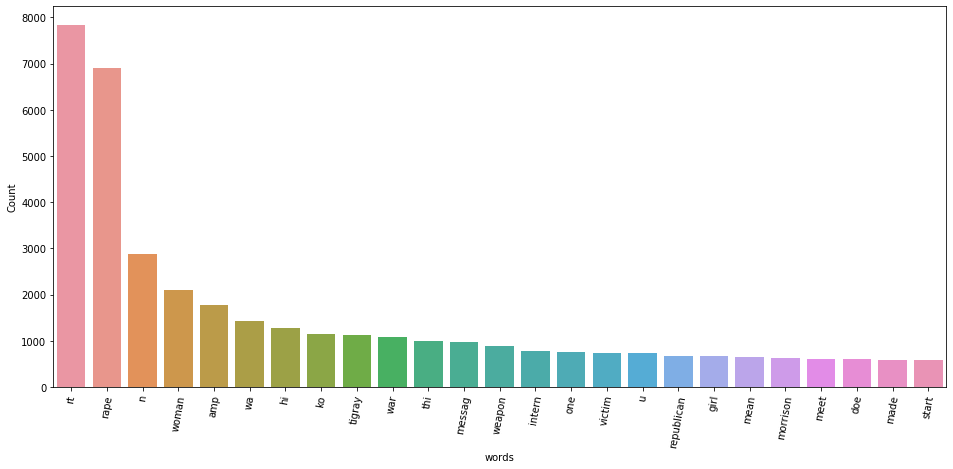

In [160]:
words = words_extract(tweets_df['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

In [161]:
all_words = ' '.join(ps.stem(j) for j in tweets_df['cleaned_tweet_extensive'].str.lower())

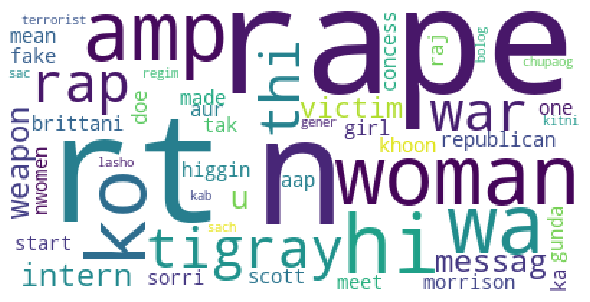

In [162]:
#Creating wordcloud for all tweets
create_wordcloud(all_words)

In [163]:
unicef = pd.read_csv('C:/Users/kachase/Desktop/tweets/UNICEF_JP_FGM.csv')

In [164]:
unicef.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag
0,1,Central Africa Standard Time\t,2021-05-09,\t\t#MothersDay GirlsðŸ‘§ are the future ðŸ¤°m...
1,2,Central Africa Standard Time\t,2021-05-09,\t\tThe most damaging effects on the rights of...
2,3,Central Africa Standard Time\t,2021-05-08,\t\tDiscovering that the infections that troub...
3,4,Central Africa Standard Time\t,2021-05-08,"\t\tTo #EndFGM, communities need to collective..."
4,5,Central Africa Standard Time\t,2021-05-07,\t\tThe #COVID19 pandemic posed an increased n...


In [165]:
unicef.rename(columns = {'Tweets_tag':'Tweets','Date':'date'},inplace = True)

In [166]:
unicef.drop_duplicates(inplace = True)    # Drop duplicates
unicef.reset_index(drop = True, inplace = True)
len(unicef)

5858

In [167]:
cleaned_tweet = []
newtext = ""
for text in unicef['Tweets']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""

In [168]:
unicef['cleaned_tweet'] = cleaned_tweet

In [169]:
unicef['cleaned_tweet_preprocess'] = unicef['cleaned_tweet'].apply(lemmatize_text)
unicef['cleaned_tweet_preprocess'] = unicef['cleaned_tweet_preprocess'].apply(', '.join)

In [170]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in unicef['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
unicef['cleaned_tweet_extensive']= cleaned_tweets_extensive
unicef.head(10)

,Unnamed: 0,Time_Zone,date,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,1,Central Africa Standard Time\t,2021-05-09,\t\t#MothersDay GirlsðŸ‘§ are the future ðŸ¤°m...,#mothersday girlsðÿ‘§ are the future ðÿ¤°mothe...,"#mothersday, girlsðÿ‘§, are, the, futur, ðÿ¤°m...",mothersday girl futur mother import focu well ...
1,2,Central Africa Standard Time\t,2021-05-09,\t\tThe most damaging effects on the rights of...,the most damaging effects on the rights of gir...,"the, most, damag, effect, on, the, right, of, ...",damag effect right girl woman prolif physic se...
2,3,Central Africa Standard Time\t,2021-05-08,\t\tDiscovering that the infections that troub...,discovering that the infections that troubled ...,"discov, that, the, infect, that, troubl, most,...",discov infect troubl woman villag mali link fg...
3,4,Central Africa Standard Time\t,2021-05-08,"\t\tTo #EndFGM, communities need to collective...","to #endfgm, communities need to collectively t...","to, #endfgm,, commun, need, to, collect, trans...",endfgm commun need collect transform norm stan...
4,5,Central Africa Standard Time\t,2021-05-07,\t\tThe #COVID19 pandemic posed an increased n...,the pandemic posed an increased need for menta...,"the, pandem, pose, an, increas, need, for, men...",pandem pose increa need mental health psychoso...
5,6,Central Africa Standard Time\t,2021-05-07,"\t\tSince 2008, @GPtoEndFGM has been supportin...","since 2008, @gptoendfgm has been supporting th...","sinc, 2008,, @gptoendfgm, ha, been, support, t...",sinc ha support develop enabl polici legal fra...
6,7,Central Africa Standard Time\t,2021-05-06,"\t\tMeet Astan Fomba (16) from Fougadougou, #M...","meet astan fomba (16) from fougadougou, #mali ...","meet, astan, fomba, (16), from, fougadougou,, ...",meet astan fomba fougadoug mali one villag pub...
7,8,Central Africa Standard Time\t,2021-05-06,\t\tEnsuring access to health services to thos...,ensuring access to health services to those af...,"ensur, access, to, health, servic, to, those, ...",ensur access health servic affect risk fgm onl...
8,9,Central Africa Standard Time\t,2021-05-06,\t\tâš ï¸�FGM is never safe &amp; there is no ...,âš ï¸�fgm is never safe &amp; there is no medi...,"âš, ï¸�fgm, is, never, safe, &amp;, there, is,...",fgm never safe amp medic justif let celebr mid...
9,10,Central Africa Standard Time\t,2021-05-05,\t\tFatouma once used her hands to perform FGM...,fatouma once used her hands to perform fgm. no...,"fatouma, onc, use, her, hand, to, perform, fgm...",fatouma onc use hand perform fgm u bring babi ...


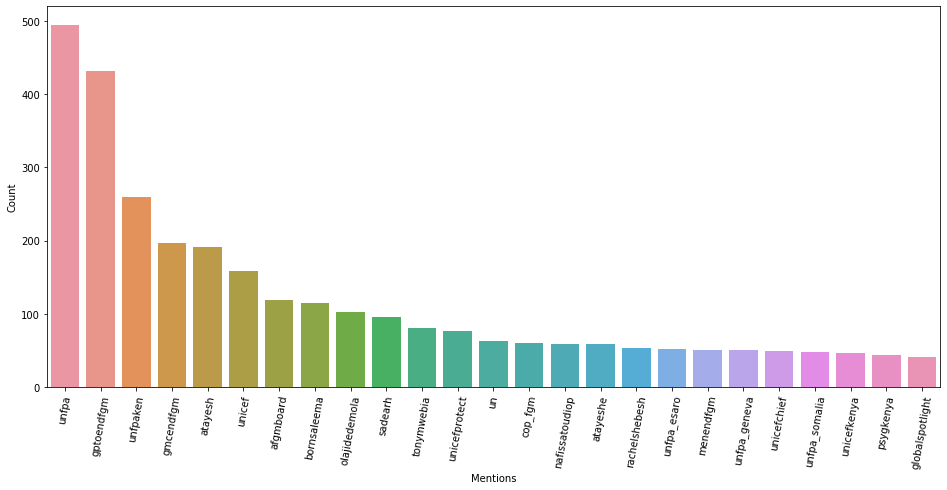

In [171]:
mentions = mention_extract(unicef['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

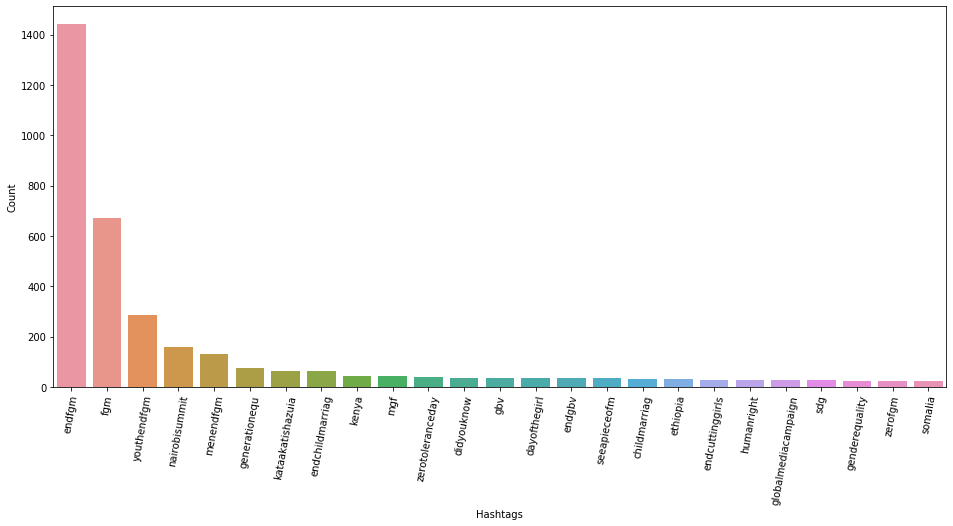

In [172]:
hashtags = hashtags_extract(unicef['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

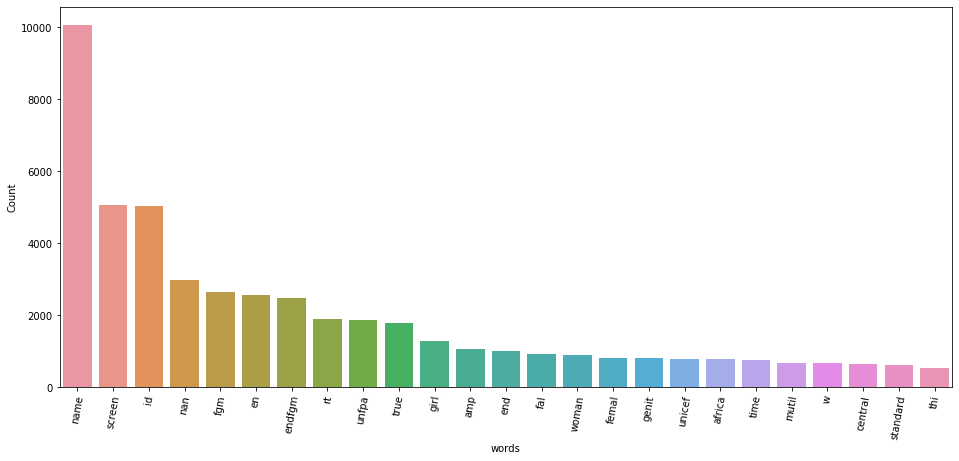

In [173]:
words = words_extract(unicef['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

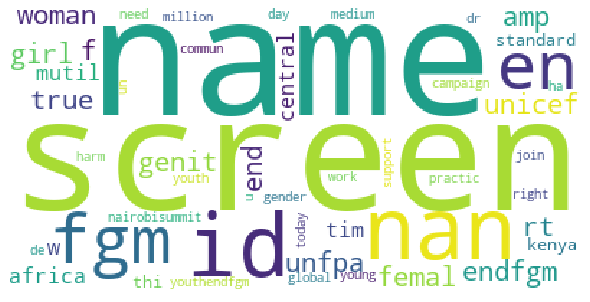

In [174]:
all_words = ' '.join(ps.stem(j) for j in unicef['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)

In [175]:
unicef[unicef['cleaned_tweet_extensive'].str.contains("name")].head(10)

,Unnamed: 0,Time_Zone,date,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,1,Central Africa Standard Time\t,2021-05-09,\t\t#MothersDay GirlsðŸ‘§ are the future ðŸ¤°m...,#mothersday girlsðÿ‘§ are the future ðÿ¤°mothe...,"#mothersday, girlsðÿ‘§, are, the, futur, ðÿ¤°m...",mothersday girl futur mother import focu well ...
2,3,Central Africa Standard Time\t,2021-05-08,\t\tDiscovering that the infections that troub...,discovering that the infections that troubled ...,"discov, that, the, infect, that, troubl, most,...",discov infect troubl woman villag mali link fg...
3,4,Central Africa Standard Time\t,2021-05-08,"\t\tTo #EndFGM, communities need to collective...","to #endfgm, communities need to collectively t...","to, #endfgm,, commun, need, to, collect, trans...",endfgm commun need collect transform norm stan...
4,5,Central Africa Standard Time\t,2021-05-07,\t\tThe #COVID19 pandemic posed an increased n...,the pandemic posed an increased need for menta...,"the, pandem, pose, an, increas, need, for, men...",pandem pose increa need mental health psychoso...
5,6,Central Africa Standard Time\t,2021-05-07,"\t\tSince 2008, @GPtoEndFGM has been supportin...","since 2008, @gptoendfgm has been supporting th...","sinc, 2008,, @gptoendfgm, ha, been, support, t...",sinc ha support develop enabl polici legal fra...
7,8,Central Africa Standard Time\t,2021-05-06,\t\tEnsuring access to health services to thos...,ensuring access to health services to those af...,"ensur, access, to, health, servic, to, those, ...",ensur access health servic affect risk fgm onl...
12,13,Central Africa Standard Time\t,2021-05-05,\t\tEnding FGM requires focus on preventative ...,ending fgm requires focus on preventative inte...,"end, fgm, requir, focu, on, prevent, intervent...",end fgm requir focu prevent interv mobil relig...
13,14,Central Africa Standard Time\t,2021-05-04,\t\tWould you place your own daughter at harm ...,would you place your own daughter at harm in t...,"would, you, place, your, own, daughter, at, ha...",would place daughter harm name tradit said fem...
15,16,Central Africa Standard Time\t,2021-05-04,"\t\tIn 2020, through @GPtoEndFGM, 801 men and ...","in 2020, through @gptoendfgm, 801 men and boys...","in, 2020,, through, @gptoendfgm,, 801, men, an...",men boy network coalit activ advoc fgm elimin ...
17,18,Central Africa Standard Time\t,2021-05-03,\t\tA step in the right direction towards achi...,a step in the right direction towards achievin...,"a, step, in, the, right, direct, toward, achie...",step right direct toward achiev genderequ huma...


In [176]:
tanzania = pd.read_csv("C:/Users/kachase/Desktop/tweets/Tanzania.csv")

In [177]:
tanzania.head()

,Unnamed: 0,Time_Zone,Date,Username,all_tweets_clean_links
0,0,Central Africa Standard Time\t,2021-05-07,CDF Tanzania,“ msichana akiolewa akiwa mdogo (mtoto) anapat...
1,1,Central Africa Standard Time\t,2021-05-07,CDF Tanzania,“Our parents say that if a girl is married at ...
2,2,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,Mafunzo kwa kwa maafisa wa Dawati la Polisi la...
3,3,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,@cdftz kwa kushirikiana na Jeshi la Polisi kwa...
4,4,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,"""“I think parents marry off their children bec..."


In [178]:
tanzania.rename(columns = {'all_tweets_clean_links':'Tweets','Date':'date'},inplace = True)

In [179]:
tanzania.drop_duplicates(inplace = True)    # Drop duplicates
tanzania.reset_index(drop = True, inplace = True)
len(tanzania)

3199

In [180]:
cleaned_tweet = []
newtext = ""
for text in tanzania['Tweets']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""
tanzania['cleaned_tweet'] = cleaned_tweet

In [181]:
tanzania['cleaned_tweet_preprocess'] = tanzania['cleaned_tweet'].apply(lemmatize_text)
tanzania['cleaned_tweet_preprocess'] = tanzania['cleaned_tweet_preprocess'].apply(', '.join)

In [182]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in tanzania['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
tanzania['cleaned_tweet_extensive']= cleaned_tweets_extensive
tanzania.head(10)

,Unnamed: 0,Time_Zone,date,Username,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,0,Central Africa Standard Time\t,2021-05-07,CDF Tanzania,“ msichana akiolewa akiwa mdogo (mtoto) anapat...,“ msichana akiolewa akiwa mdogo (mtoto) anapat...,"“, msichana, akiolewa, akiwa, mdogo, (mtoto), ...",msichana akiolewa akiwa mdogo mtoto anapata ma...
1,1,Central Africa Standard Time\t,2021-05-07,CDF Tanzania,“Our parents say that if a girl is married at ...,“our parents say that if a girl is married at ...,"“our, parent, say, that, if, a, girl, is, marr...",parent say girl marri earli age receiv higher ...
2,2,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,Mafunzo kwa kwa maafisa wa Dawati la Polisi la...,mafunzo kwa kwa maafisa wa dawati la polisi la...,"mafunzo, kwa, kwa, maafisa, wa, dawati, la, po...",mafunzo kwa kwa maafisa wa dawati la polisi la...
3,3,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,@cdftz kwa kushirikiana na Jeshi la Polisi kwa...,@cdftz kwa kushirikiana na jeshi la polisi kwa...,"@cdftz, kwa, kushirikiana, na, jeshi, la, poli...",kwa kushirikiana na jeshi la polisi kwa ufadhi...
4,4,Central Africa Standard Time\t,2021-05-05,CDF Tanzania,"""“I think parents marry off their children bec...","""“i think parents marry off their children bec...","""“i, think, parent, marri, off, their, child, ...",think parent marri child becau life forc male ...
5,5,Central Africa Standard Time\t,2021-05-04,CDF Tanzania,""""""" miaka 17 Mkoani Shinyanga) #ZuiaUkatili #...",""""""" miaka 17 mkoani shinyanga) #zuiaukatili #e...",""""""", miaka, 17, mkoani, shinyanga), #zuiaukati...",miaka mkoani shinyanga zuiaukatili endvawc zui...
6,6,Central Africa Standard Time\t,2021-05-04,CDF Tanzania,“Many girls in this village marry after they f...,“many girls in this village marry after they f...,"“mani, girl, in, thi, villag, marri, after, th...",mani girl thi villag marri finish primari scho...
7,7,Central Africa Standard Time\t,2021-05-04,CDF Tanzania,@elkindy Asante kwa kutuandikia ujumbe tutalif...,@elkindy asante kwa kutuandikia ujumbe tutalif...,"@elkindi, asant, kwa, kutuandikia, ujumb, tuta...",asant kwa kutuandikia ujumb tutalifanyia kazi
8,8,Central Africa Standard Time\t,2021-05-04,CDF Tanzania,@noto77830589 @bajabiri Itabidi tuwaulize.\ttl...,@bajabiri itabidi tuwaulize. tl [] [] [] 0 0 1...,"@bajabiri, itabidi, tuwaulize., tl, [], [], []...",itabidi tuwaul tl name notox id screen name ba...
9,9,Central Africa Standard Time\t,2021-05-04,CDF Tanzania,@MutRay2 @MabalaMakengeza Ni kweli kabisa. Asa...,@mabalamakengeza ni kweli kabisa. asante kwa m...,"@mabalamakengeza, ni, kweli, kabisa., asant, k...",ni kweli kabisa asant kwa maoni yako tl name m...


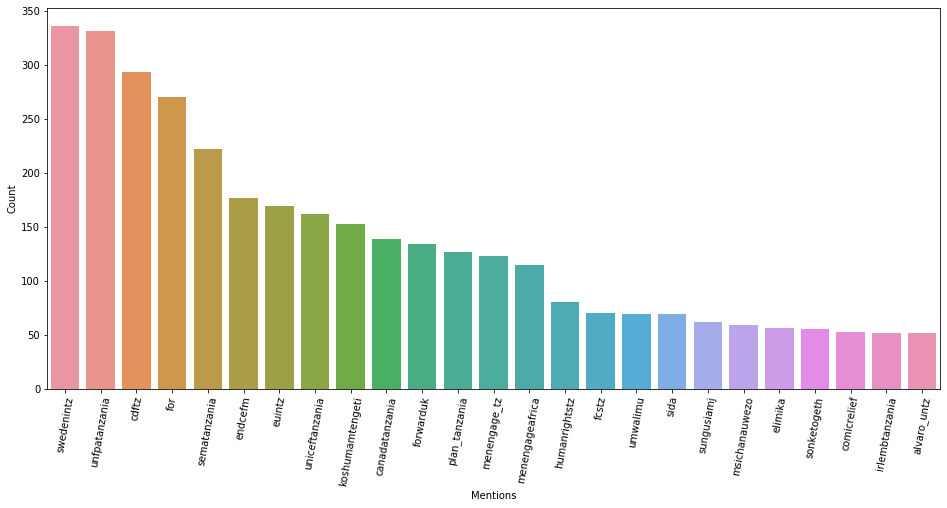

In [183]:
mentions = mention_extract(tanzania['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

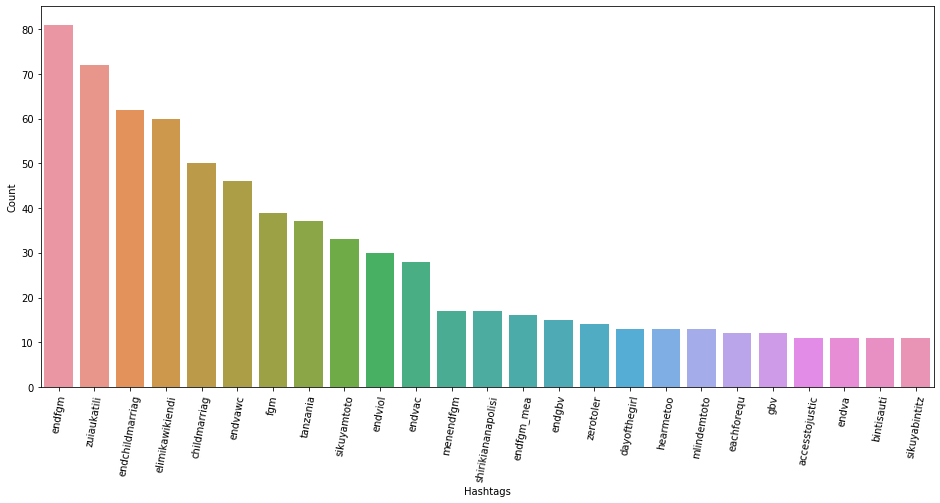

In [184]:
hashtags = hashtags_extract(tanzania['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

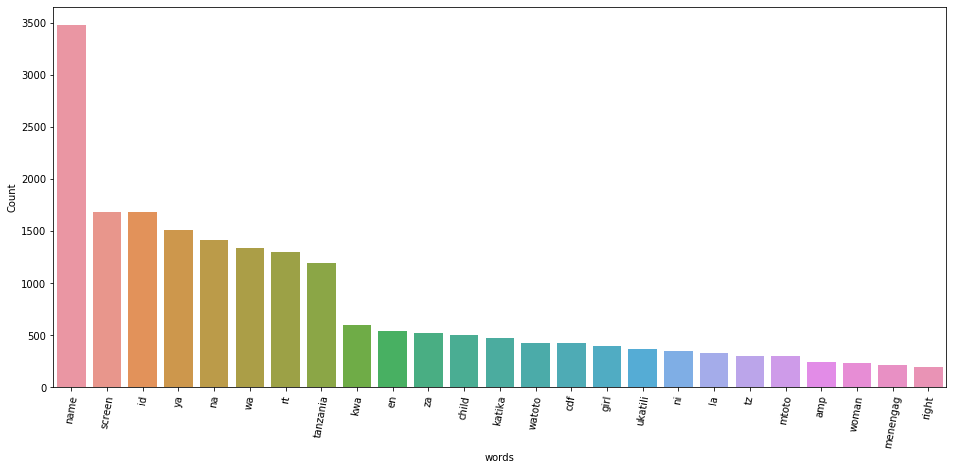

In [185]:
words = words_extract(tanzania['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

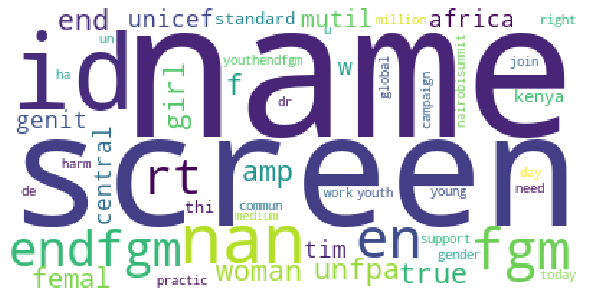

In [186]:
all_words = ' '.join(ps.stem(j) for j in unicef['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)

In [187]:
fida = pd.read_csv("C:/Users/kachase/Desktop/tweets/Fidakenya.csv")

In [188]:
fida.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag
0,0,Central Africa Standard Time\t,2021-04-30,\t\tMajor throw back! FIDA Kenya Board members...
1,1,Central Africa Standard Time\t,2021-04-30,"\t\t""""""While we may be individually strong, we..."
2,2,Central Africa Standard Time\t,2021-04-30,\t\t@felix_kimm @Awireri @WanjiruKamanda @iluv...
3,3,Central Africa Standard Time\t,2021-04-30,\t\t@Mukami_Mungai @StandardKenya @Mukami_Mung...
4,4,Central Africa Standard Time\t,2021-04-27,\t\t@fidakenya We celebrate our


In [189]:
fida.rename(columns = {'Tweets_tag':'Tweets','Date':'date'},inplace = True)

In [190]:
fida.drop_duplicates(inplace = True)    # Drop duplicates
fida.reset_index(drop = True, inplace = True)
len(fida)

3178

In [191]:
cleaned_tweet = []
newtext = ""
for text in fida['Tweets']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""
fida['cleaned_tweet'] = cleaned_tweet

In [192]:
fida['cleaned_tweet_preprocess'] = fida['cleaned_tweet'].apply(lemmatize_text)
fida['cleaned_tweet_preprocess'] = fida['cleaned_tweet_preprocess'].apply(', '.join)

In [193]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in fida['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
fida['cleaned_tweet_extensive']= cleaned_tweets_extensive
fida.head(10)

,Unnamed: 0,Time_Zone,date,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,0,Central Africa Standard Time\t,2021-04-30,\t\tMajor throw back! FIDA Kenya Board members...,major throw back! fida kenya board members dur...,"major, throw, back!, fida, kenya, board, membe...",major throw back fida kenya board member dure ...
1,1,Central Africa Standard Time\t,2021-04-30,"\t\t""""""While we may be individually strong, we...","""""""while we may be individually strong, we are...","""""""while, we, may, be, individu, strong,, we, ...",may individu strong collect power rakhi voria ...
2,2,Central Africa Standard Time\t,2021-04-30,\t\t@felix_kimm @Awireri @WanjiruKamanda @iluv...,@felix_kimm @awireri @wanjirukamanda @iluville...,"@felix_kimm, @awireri, @wanjirukamanda, @iluvi...",kimm kind mwend kenya apolog kindli dm contact...
3,3,Central Africa Standard Time\t,2021-04-30,\t\t@Mukami_Mungai @StandardKenya @Mukami_Mung...,@mukami_mungai @standardkenya @mukami_mungai t...,"@mukami_mungai, @standardkenya, @mukami_mungai...",mungai mungai thi photo taken dure fida board ...
4,4,Central Africa Standard Time\t,2021-04-27,\t\t@fidakenya We celebrate our,@fidakenya we celebrate our,"@fidakenya, we, celebr, our",celebr
5,5,Central Africa Standard Time\t,2021-04-26,\t\t@fidakenya calls upon members of the publi...,@fidakenya calls upon members of the public to...,"@fidakenya, call, upon, member, of, the, publi...",call upon member public report ani gbv matter ...
6,6,Central Africa Standard Time\t,2021-04-26,"\t\tH.E Dr. William Kingi, the Deputy Governor...","h.e dr. william kingi, the deputy governor mom...","h.e, dr., william, kingi,, the, deputi, govern...",h e dr william kingi deputi governor mombasa c...
7,7,Central Africa Standard Time\t,2021-04-26,\t\t@fidakenya through support from USAID &amp...,@fidakenya through support from usaid &amp;sfc...,"@fidakenya, through, support, from, usaid, &am...",support usaid amp sfcg conjunct mombasa counti...
8,8,Central Africa Standard Time\t,2021-04-20,\t\tRT @RailaOdinga: This scourge must come to...,rt @railaodinga: this scourge must come to an ...,"rt, @railaodinga:, thi, scourg, must, come, to...",rt thi scourg must come end abnorm murder cann...
9,9,Central Africa Standard Time\t,2021-04-16,"\t\t@UNFPA @woman_kind @awdf01\tund\t""[{'scree...","@unfpa @woman_kind und ""[{'screen_name': 'woma...","@unfpa, @woman_kind, und, ""[{'screen_name':, '...",kind und screen name woman kind name womankind...


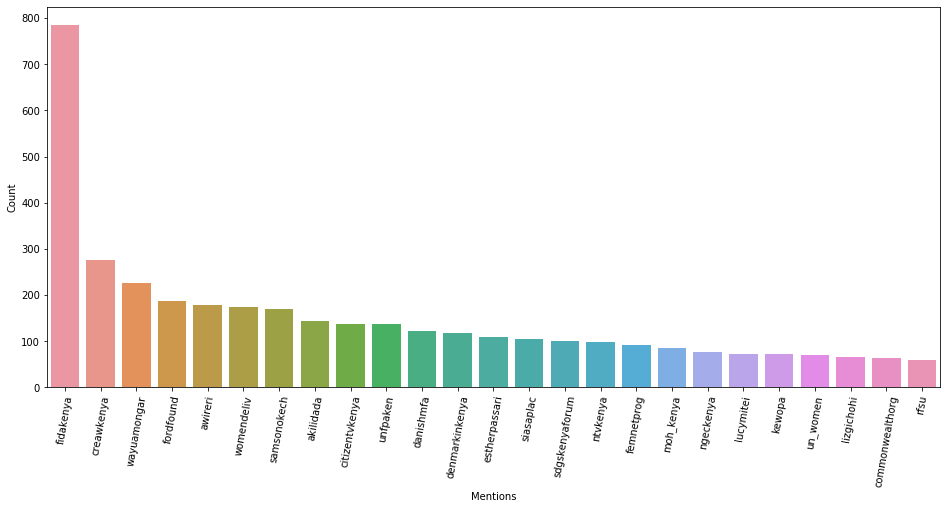

In [194]:
mentions = mention_extract(fida['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

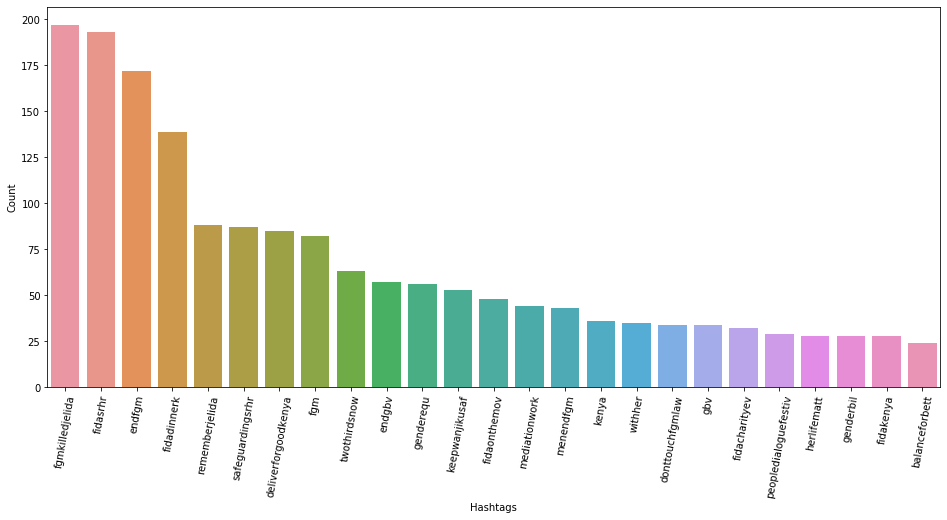

In [195]:
hashtags = hashtags_extract(fida['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

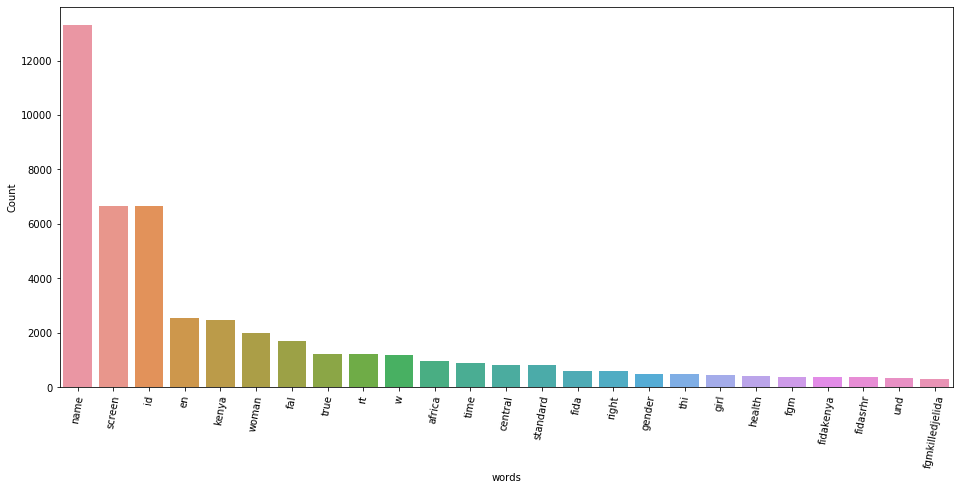

In [196]:
words = words_extract(fida['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

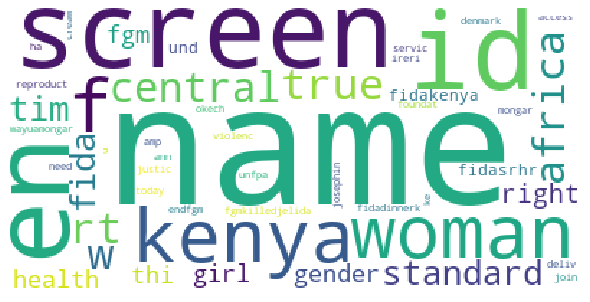

In [197]:
all_words = ' '.join(ps.stem(j) for j in fida['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)

In [198]:
altorg = pd.read_csv("C:/Users/kachase/Desktop/tweets/AltowrOrg.csv")

In [199]:
altorg.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag
0,1,Central Africa Standard Time\t,2021-04-15,\t\t@cipesaug Link to join the Roundtable at 3...
1,2,Central Africa Standard Time\t,2021-04-15,\t\t@muyambo_r @RachaHaffar Link to join the R...
2,3,Central Africa Standard Time\t,2021-04-15,\t\t@viac237 Link to join the Roundtable at 3 ...
3,4,Central Africa Standard Time\t,2021-04-15,\t\t@sodfadaaji Link to join the Roundtable - ...
4,5,Central Africa Standard Time\t,2021-04-15,\t\tJoin the Strategic Roundtable on the Role ...


In [200]:
altorg.rename(columns = {'Tweets_tag':'Tweets','Date':'date'},inplace = True)

In [201]:
altorg.drop_duplicates(inplace = True)    # Drop duplicates
altorg.reset_index(drop = True, inplace = True)
len(altorg)

189

In [202]:
cleaned_tweet = []
newtext = ""
for text in altorg['Tweets']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""
altorg['cleaned_tweet'] = cleaned_tweet

In [203]:
altorg['cleaned_tweet_preprocess'] = altorg['cleaned_tweet'].apply(lemmatize_text)
altorg['cleaned_tweet_preprocess'] = altorg['cleaned_tweet_preprocess'].apply(', '.join)

In [204]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in altorg['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
altorg['cleaned_tweet_extensive']= cleaned_tweets_extensive
altorg.head(10)

,Unnamed: 0,Time_Zone,date,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,1,Central Africa Standard Time\t,2021-04-15,\t\t@cipesaug Link to join the Roundtable at 3...,@cipesaug link to join the roundtable at 3 pm ...,"@cipesaug, link, to, join, the, roundtabl, at,...",link join roundtabl pm gmt en fal screen name ...
1,2,Central Africa Standard Time\t,2021-04-15,\t\t@muyambo_r @RachaHaffar Link to join the R...,@muyambo_r @rachahaffar link to join the round...,"@muyambo_r, @rachahaffar, link, to, join, the,...",r link join roundtabl pm gmt en fal screen nam...
2,3,Central Africa Standard Time\t,2021-04-15,\t\t@viac237 Link to join the Roundtable at 3 ...,link to join the roundtable at 3 pm gmt - en [...,"link, to, join, the, roundtabl, at, 3, pm, gmt...",link join roundtabl pm gmt en fal screen name ...
3,4,Central Africa Standard Time\t,2021-04-15,\t\t@sodfadaaji Link to join the Roundtable - ...,@sodfadaaji link to join the roundtable - en [...,"@sodfadaaji, link, to, join, the, roundtabl, -...",link join roundtabl en fal screen name sodfada...
4,5,Central Africa Standard Time\t,2021-04-15,\t\tJoin the Strategic Roundtable on the Role ...,join the strategic roundtable on the role of t...,"join, the, strateg, roundtabl, on, the, role, ...",join strateg roundtabl role internet fuel grow...
5,6,Central Africa Standard Time\t,2021-04-14,\t\tRT @GIVENALITY: @AltowrOrg @cipesaug @APC_...,rt @givenality: @altowrorg @cipesaug @apc_news...,"rt, @givenality:, @altowrorg, @cipesaug, @apc_...",rt new platform thank good luck awesom work th...
6,7,Central Africa Standard Time\t,2021-04-14,\t\t@GIVENALITY @cipesaug @APC_News @AGA_Platf...,@givenality @cipesaug @apc_news @aga_platform ...,"@given, @cipesaug, @apc_new, @aga_platform, th...",new platform thank particip leverag input tomo...
7,8,Central Africa Standard Time\t,2021-04-14,\t\t@GIVENALITY @cipesaug @APC_News @AGA_Platf...,@givenality @cipesaug @apc_news @aga_platform ...,"@given, @cipesaug, @apc_new, @aga_platform, th...",new platform thank take note last question thi...
8,9,Central Africa Standard Time\t,2021-04-14,\t\t@GIVENALITY @cipesaug @APC_News @AGA_Platf...,@givenality @cipesaug @apc_news @aga_platform ...,"@given, @cipesaug, @apc_new, @aga_platform, wh...",new platform african legal think tank woman
9,10,Central Africa Standard Time\t,2021-04-14,\t\t@GIVENALITY @cipesaug @APC_News @AGA_Platf...,@givenality @cipesaug @apc_news @aga_platform ...,"@given, @cipesaug, @apc_new, @aga_platform, we...",new platform know input deserv peculiar attent...


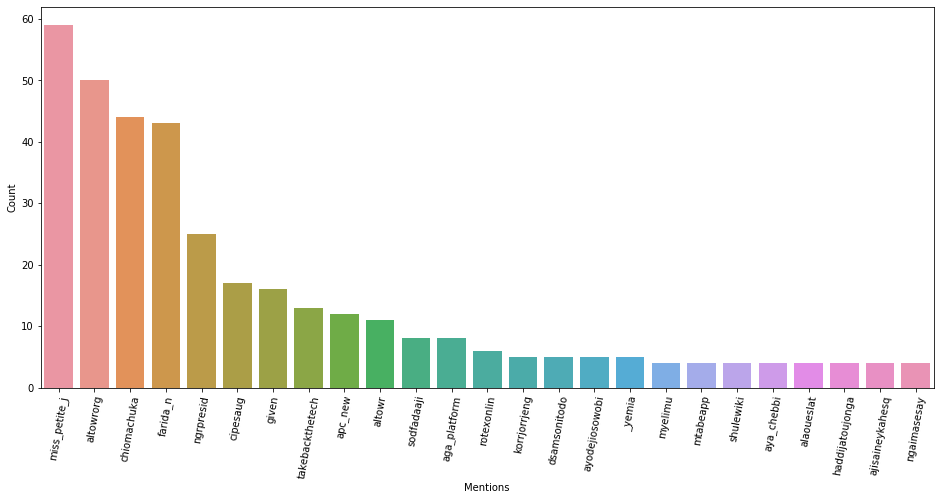

In [205]:
mentions = mention_extract(altorg['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

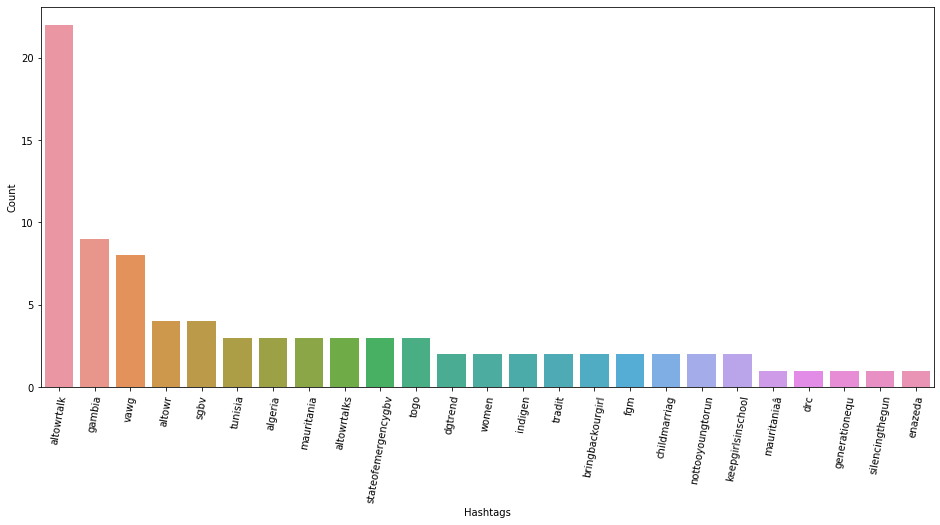

In [206]:
hashtags = hashtags_extract(altorg['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

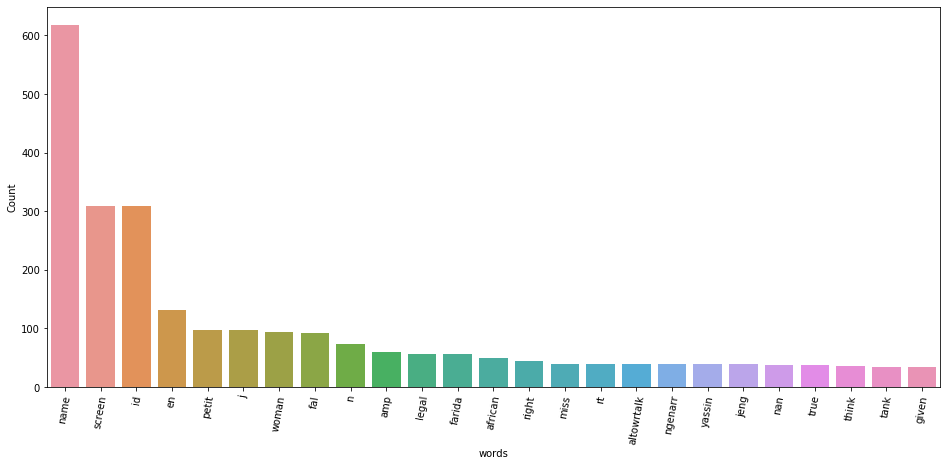

In [207]:
words = words_extract(altorg['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

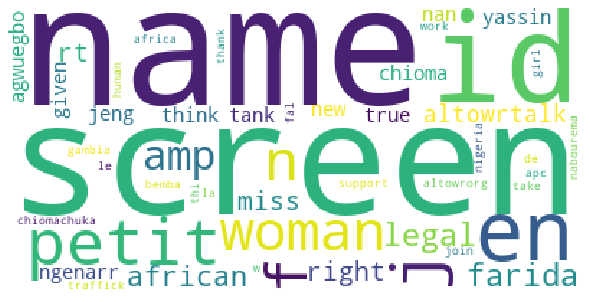

In [208]:
all_words = ' '.join(ps.stem(j) for j in altorg['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)

In [209]:
net = pd.read_csv("C:/Users/kachase/Desktop/tweets/GBV_Prevention_Net.csv")

In [210]:
net.head()

,Unnamed: 0,Time_Zone,Date,Tweets_tag
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und..."
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ..."
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...


In [211]:
net.rename(columns = {'Tweets_tag':'Tweets','Date':'date'},inplace = True)

In [227]:
net.drop_duplicates(inplace = True)    # Drop duplicates
net.reset_index(drop = True, inplace = True)
len(net)

3242

In [228]:
cleaned_tweet = []
newtext = ""
for text in net['Tweets']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""
net['cleaned_tweet'] = cleaned_tweet

In [229]:
net['cleaned_tweet_preprocess'] = net['cleaned_tweet'].apply(lemmatize_text)
net['cleaned_tweet_preprocess'] = net['cleaned_tweet_preprocess'].apply(', '.join)

In [239]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in net['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
net['cleaned_tweet_extensive']= cleaned_tweets_extensive
net.head(10)

,Unnamed: 0,Time_Zone,date,Tweets,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,0,Central Africa Standard Time\t,2021-05-07,"\t\tIn preventing #VAW, it is necessary to und...","in preventing #vaw, it is necessary to underst...","in, prevent, #vaw,, it, is, necessari, to, und...",prevent vaw necessari understand recogn role p...
1,1,Central Africa Standard Time\t,2021-05-06,\t\tRT @SamaritanOrgan1: @GBVnet @WIIS_HoA Eve...,rt @gbvnet @wiis_hoa every day we live by our ...,"rt, @gbvnet, @wiis_hoa, everi, day, we, live, ...",rt hoa everi day live vision b lead grassroot ...
2,2,Central Africa Standard Time\t,2021-05-06,\t\tRT @KobugabeLucky: This was such an aspira...,rt @kobugabelucky: this was such an aspiration...,"rt, @kobugabelucky:, thi, wa, such, an, aspir,...",rt thi wa aspir read wait conver tomorrow en s...
3,3,Central Africa Standard Time\t,2021-05-06,"\t\tRT @aj_emurwon: Wrote A Family Meeting, a ...","rt @aj_emurwon: wrote a family meeting, a shor...","rt, @aj_emurwon:, wrote, a, famili, meeting,, ...",rt emurwon wrote famili meet short stori imago...
4,4,Central Africa Standard Time\t,2021-05-06,\t\tRT @YfcUganda: Why is it Dangerous? Victim...,rt @yfcuganda: why is it dangerous? victim-bla...,"rt, @yfcuganda:, whi, is, it, dangerous?, vict...",rt whi danger victim blam attitud margin victi...
5,5,Central Africa Standard Time\t,2021-05-06,\t\tRT @Drsaalajeng: Seeing my Senegalese femi...,rt @drsaalajeng: seeing my senegalese feminist...,"rt, @drsaalajeng:, see, my, senegales, feminis...",rt see senegal feminist sister go lot onlin ab...
6,6,Central Africa Standard Time\t,2021-05-06,\t\tRT @Drsaalajeng: Visuals from @GBVnet htt...,rt @drsaalajeng: visuals from @gbvnet en [{'sc...,"rt, @drsaalajeng:, visual, from, @gbvnet, en, ...",rt visual en screen name drsaalajeng name rama...
7,7,Central Africa Standard Time\t,2021-05-06,\t\tRT @GBVnet: VAW is an injustice and violat...,rt @gbvnet: vaw is an injustice and violation ...,"rt, @gbvnet:, vaw, is, an, injustic, and, viol...",rt vaw injust violat right woman affect u safe...
8,8,Central Africa Standard Time\t,2021-05-06,\t\tðŸ’¡Follow this on-going conversation to l...,ðÿ’¡follow this on-going conversation to learn...,"ðÿ’¡follow, thi, on-go, convers, to, learn, mo...",follow thi go conver learn new health budget c...
9,9,Central Africa Standard Time\t,2021-05-06,"\t\tRT @GBVnet: Join us tomorrow, 6th May 2021...","rt @gbvnet: join us tomorrow, may 2021 at sast...","rt, @gbvnet:, join, u, tomorrow,, may, 2021, a...",rt join u tomorrow may sast instagram live cha...


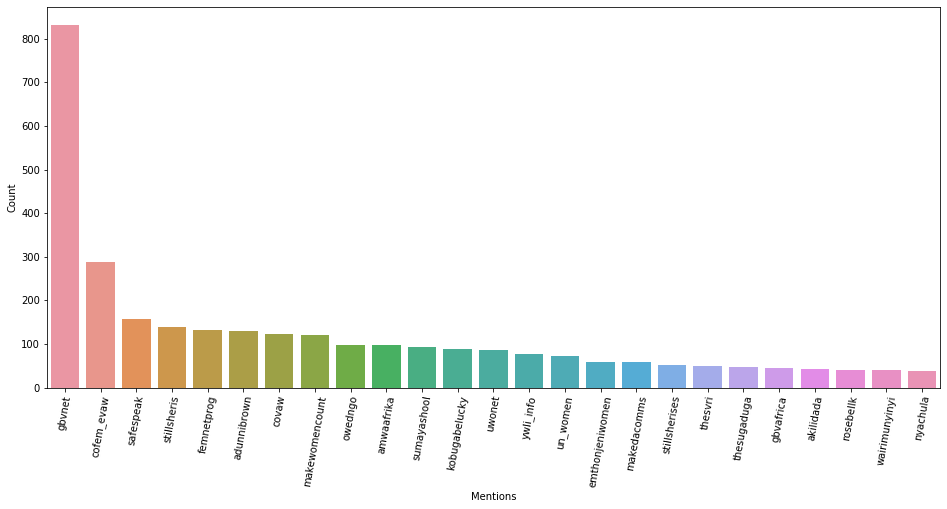

In [240]:
mentions = mention_extract(net['cleaned_tweet_preprocess'])
mentions = sum(mentions, [])

generate_mentions_freqdist(mentions)

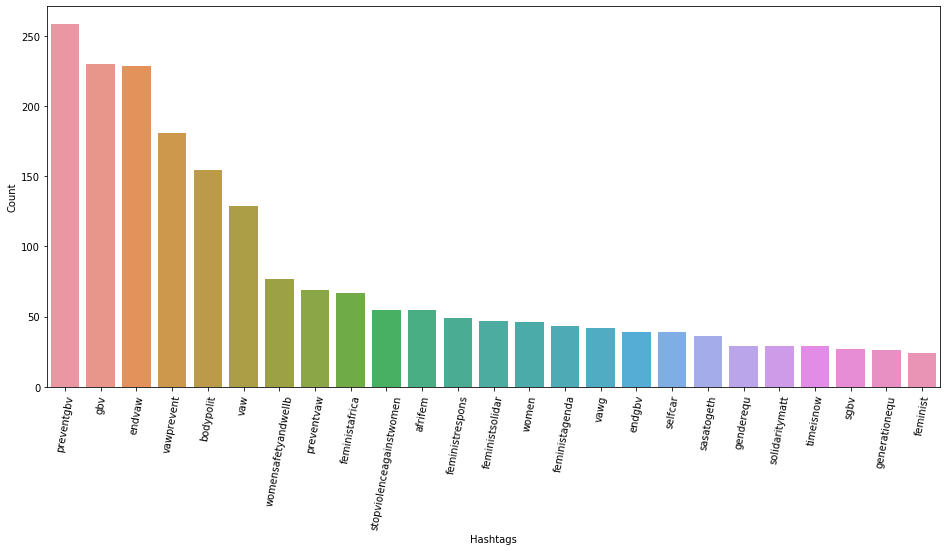

In [241]:
hashtags = hashtags_extract(net['cleaned_tweet_preprocess'])
hashtags = sum(hashtags, [])

generate_hashtags_freqdist(hashtags)

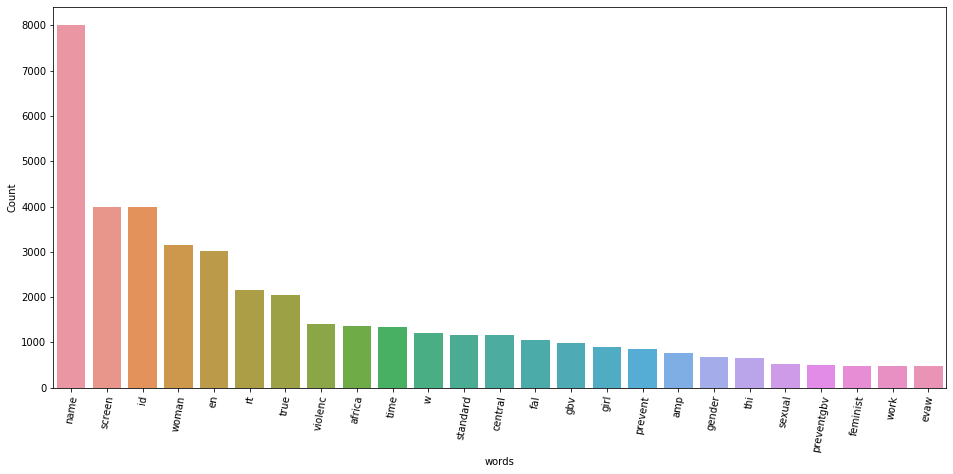

In [242]:
words = words_extract(net['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)

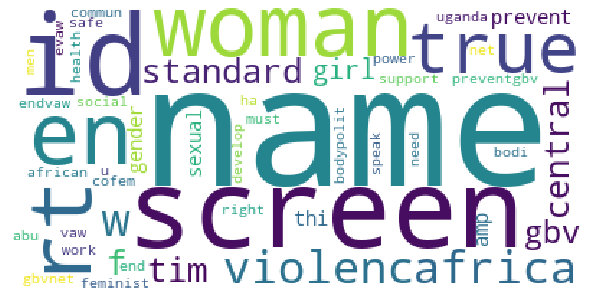

In [243]:
all_words = ' '.join(ps.stem(j) for j in net['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)

In [212]:
lawrence = pd.read_csv("C:/Users/kachase/Desktop/tweets/Lawrence_Moruye_FinalSubmission.csv")

In [213]:
lawrence.head()

,tweet,type,semi_type
0,"Well, being the COMPLETE parasite that he is.....",sexual_violence,rape
1,I can't express how sad it makes me that there...,sexual_violence,rape
2,"Dom raped the girl, David enabled it. By provi...",sexual_violence,rape
3,One prosecutor Magistrates courts at the Teddy...,sexual_violence,rape
4,Then she told me 2 drinks in she was barred ou...,sexual_violence,rape


In [214]:
lawrence.rename(columns = {'Tweets':'tweet'},inplace = True)

In [215]:
lawrence.drop_duplicates(inplace = True)    # Drop duplicates
lawrence.reset_index(drop = True, inplace = True)
len(lawrence)

39650

In [216]:
lawrence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
tweet        39650 non-null object
type         39650 non-null object
semi_type    39650 non-null object
dtypes: object(3)
memory usage: 929.4+ KB


In [217]:
type_var = lawrence.type.value_counts().to_frame()

In [218]:
type_var.T

,sexual_violence,Physical_violence,emotional_violence,economic_violence,Harmful_Traditional_practice
type,32648,5946,651,217,188


In [219]:
subtype_var = lawrence.semi_type.value_counts().to_frame()

In [220]:
subtype_var.T

,rape,physical_force,humiliation,Insult,defile,sex_without_consent,deny/lost job despite qualified,FGM,child marriage,Abuse,lost /denied/job due to refused sex,spank_buttocks
semi_type,32208,5946,351,257,225,205,188,122,66,43,29,10


In [221]:
cleaned_tweet = []
newtext = ""
for text in lawrence['tweet']:
    text = str(text)
    text = text.lower()
    for word in text.split():
        if not(any(char.isdigit() for char in word) and any(char.isalpha() for char in word)):
            newtext += word + " "
    cleaned_tweet.append(newtext)
    newtext = ""
lawrence['cleaned_tweet'] = cleaned_tweet

In [222]:
lawrence['cleaned_tweet_preprocess'] = lawrence['cleaned_tweet'].apply(lemmatize_text)
lawrence['cleaned_tweet_preprocess'] = lawrence['cleaned_tweet_preprocess'].apply(', '.join)

In [223]:
# empty list to store tweets after pre-processing
cleaned_tweets_extensive = []

# pre-processing the tweets
for i in lawrence['cleaned_tweet_preprocess']:
    cleaned_tweets_extensive.append(tweet_cleaner(i))

#creating new column  
lawrence['cleaned_tweet_extensive']= cleaned_tweets_extensive
lawrence.head(10)

,tweet,type,semi_type,cleaned_tweet,cleaned_tweet_preprocess,cleaned_tweet_extensive
0,"Well, being the COMPLETE parasite that he is.....",sexual_violence,rape,"well, being the complete parasite that he is.....","well,, be, the, complet, parasit, that, he, is...",well complet parasit hi dna riddl guy rape genet
1,I can't express how sad it makes me that there...,sexual_violence,rape,i can't express how sad it makes me that there...,"i, can't, express, how, sad, it, make, me, tha...",express sad make vet amp wannab v forgotten co...
2,"Dom raped the girl, David enabled it. By provi...",sexual_violence,rape,"dom raped the girl, david enabled it. by provi...","dom, rape, the, girl,, david, enabl, it., by, ...",dom rape girl david enabl provid alcohol manip...
3,One prosecutor Magistrates courts at the Teddy...,sexual_violence,rape,one prosecutor magistrates courts at the teddy...,"one, prosecutor, magistr, court, at, the, tedd...",one prosecutor magistr court teddi bear clinic...
4,Then she told me 2 drinks in she was barred ou...,sexual_violence,rape,then she told me 2 drinks in she was barred ou...,"then, she, told, me, 2, drink, in, she, wa, ba...",told drink wa bar wa like probabl need slow sh...
5,"a “nice guy” who calls women bitches, admits h...",sexual_violence,rape,"a “nice guy” who calls women bitches, admits h...","a, “nice, guy”, who, call, woman, bitches,, ad...",nice guy call woman bitch admit cheat hi gf bl...
6,“Was I just sucking your dick?” “Yes?” “Are y...,sexual_violence,rape,“was i just sucking your dick?” “yes?” “are yo...,"“wa, i, just, suck, your, dick?”, “yes?”, “are...",wa suck dick ye good time yeah mood unstabl di...
7,Doesn't mean anything. I've been anally raped ...,sexual_violence,rape,doesn't mean anything. i've been anally raped ...,"doesn't, mean, anything., i'v, been, anal, rap...",mean anyth v anal rape twice man first wa deep...
8,"Some women ""Don't Rape Us"", some other women ""...",sexual_violence,rape,"some women ""don't rape us"", some other women ""...","some, woman, ""don't, rape, us"",, some, other, ...",woman rape u woman want anymor last time felt ...
9,Ask these 24 women about what it's like to be ...,sexual_violence,rape,ask these 24 women about what it's like to be ...,"ask, these, 24, woman, about, what, it', like,...",ask woman like rape trump gonna get deserv


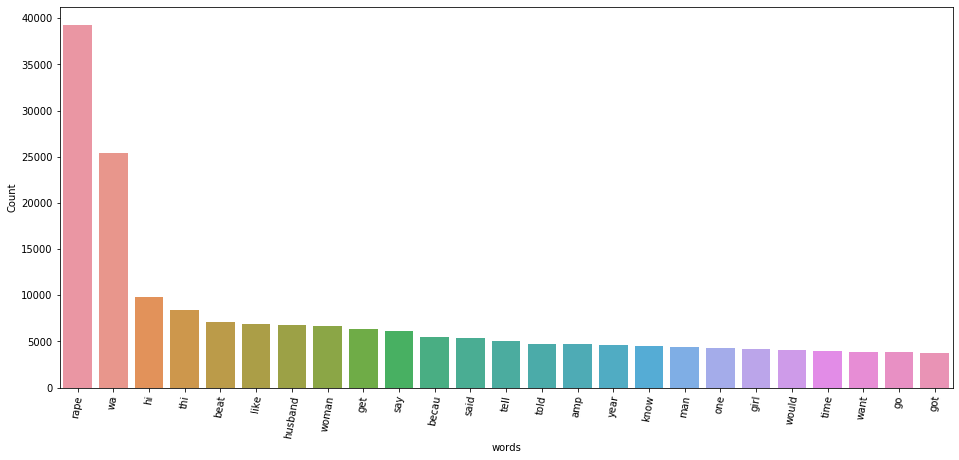

In [224]:
words = words_extract(lawrence['cleaned_tweet_extensive'])
words = sum(words, [])

generate_words_freqdist(words)


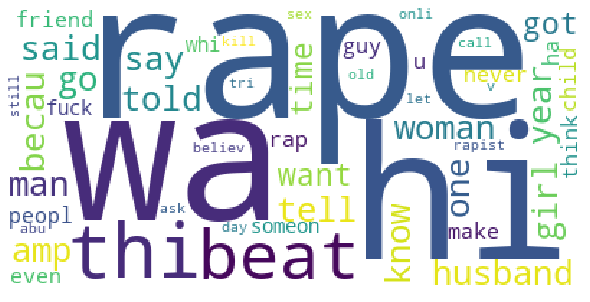

In [225]:
all_words = ' '.join(ps.stem(j) for j in lawrence['cleaned_tweet_extensive'].str.lower())
create_wordcloud(all_words)